# Initialization
The above formula is for the initialization and the definition for the matrix in the tight binding model

In [1]:
# Import numpy for matrix, scipy for ???, tinyarray for fast matrix processing.
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
# Define Pauli matrices
s_0 = np.identity(2)
s_z = np.array([[1, 0], [0, -1]])
s_x = np.array([[0, 1], [1, 0]])
s_y = np.array([[0, -1j], [1j, 0]])

tau_z = np.kron(s_z, s_0)
tau_x = np.kron(s_x, s_0) 
sigma_z = np.kron(s_0, s_z) 
tau_zsigma_x = np.kron(s_z, s_x)

# 定义一维BdG紧束缚模型
def BdG1d(L,H_onsite,H_hop):
    H_0 = np.eye(L,None,0)
    H_R  = np.eye(L,None,1) 
    H_L  = np.eye(L,None,-1)
    H_BdG = np.kron(H_0, H_onsite) + np.kron(H_R, H_hop) + np.kron(H_L, np.transpose(np.conj(H_hop)))
    return H_BdG

#定义Majorana表象下的紧束缚模型
def Majorana1d(L,H_onsite,H_hop):
    H_0 = np.eye(L,None,0)
    H_R  = np.eye(L,None,1) 
    H_L  = np.eye(L,None,-1)
    H_Mf = np.kron(H_0, H_onsite) + np.kron(H_R, H_hop) - np.kron(H_L, np.transpose(H_hop))
    return H_Mf

# Calculation the Spectrum within Majorana representaion.



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


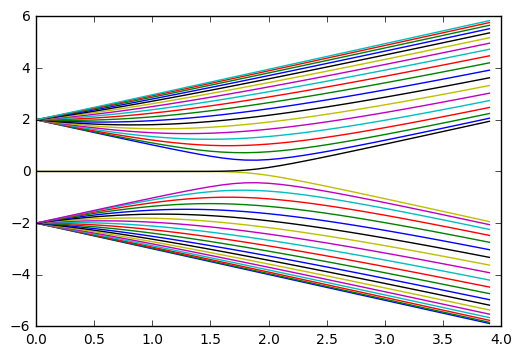

In [2]:
##计算Kitaev模型！！！Majorana表象！
t = delta = 1
L = 20
#定义横轴及纵轴
mus = np.arange(0, 4,0.1 )
band = np.zeros(shape=(mus.shape[0],2*L))

#计算能谱
for mu in mus:
    H_onsite = np.array([[0, mu], [-mu, 0]])  
    H_hop = np.array([[0, -t+delta], [t+delta, 0]])
    H_Mf = 1j*Majorana1d(L, H_onsite, H_hop,)
    eigenval, eigenvec = np.linalg.eig(H_Mf)
    idx = eigenval.argsort()
    eigenval = eigenval[idx]
    eigenvec = eigenvec[:,idx]
    band[np.argwhere(mus == mu),:] = eigenval[:]
band = np.transpose(band)


#画图
for nband in np.arange(0,2*L-1,1):
    plt.plot(mus,band[nband,:]) # use pylab to plot mus and band
    
plt.show()# show the plot on the screen



# Calculating the spectrum in the BdG Formalism

The following python routine is to calculate the BdG Hamiltonian,

$H_{BdG} = \sum_j -t (c^\dagger_j c_{j+1} -\mu c^\dagger_j c_j) + \Delta c^dagger_j c^\dagger_j+1 + \Delta^* c_{j+1} c_j $


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


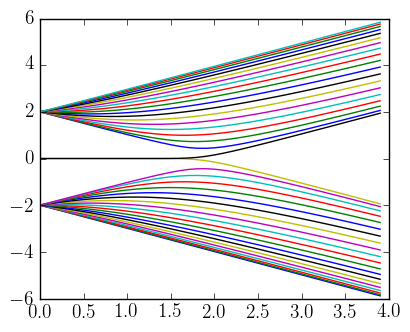

In [356]:
##计算Kitaev模型！！！BdG表象！


t = delta = 1
L = 20

#定义横轴及纵轴
mus = np.arange(0, 4, 0.1)
band = np.zeros(shape=(mus.shape[0],2*L))

#计算能谱
for mu in mus:
    H_onsite = np.array([[-mu, 0], [0, mu]])  
    H_hop = np.array([[-t, delta], [-np.conj(delta), t]])
    H_BdG = BdG1d(L, H_onsite, H_hop,)
    eigenval, eigenvec = np.linalg.eig(H_BdG)
    idx = eigenval.argsort()
    eigenval = eigenval[idx]
    eigenvec = eigenvec[:,idx]
    band[np.argwhere(mus == mu),:] = eigenval[:]
band = np.transpose(band)

#画图
for nband in np.arange(0,2*L-1,1):
    plt.plot(mus,band[nband,:]) # use pylab to plot mus and band   
plt.show()# show the plot on the screen


